In [169]:
%matplotlib inline

from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import re
import time
import math
import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Webscrape Setup

In [135]:
headers = { "User-Agent": "Data Analysis Project/ Contact me: gkrishnan.gt@gmail.com ", "Accept-Encoding": "gzip", }

url = "https://www.dice.com/jobs/q-data_scientist-limit-30-l-94133-radius-30-startPage-{}-limit-30-jobs"

r = requests.get(url.format("1"), headers=headers)
soup = BeautifulSoup(r.text)


## Let's parse the first page to find the number of entries. This will help us screen scrape appropriately

In [136]:
count_block = soup.find_all('span')
count_block[2].text

'1 - 20 of 4,631 Jobs'

In [137]:
tot_num_jobs = count_block[2].text
array_tot_num_jobs = tot_num_jobs.split(' ')
num_results = int(array_tot_num_jobs[-2].replace(',', ''))
num_pages = math.ceil (num_results/30)
print(num_results)

4631


## Let's now setup a loop to visit each individual search page and extract the links and the titles of each job

In [153]:
r = requests.get(url.format (1), headers=headers)
soup = BeautifulSoup(r.text)
soup

<!DOCTYPE html>
<html class="hydrated" data-stencil-build="ihwlt2xx" dir="ltr" lang="en"><head><meta charset="utf-8"/> <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=5.0" name="viewport"/> <meta content="Browse 4,637 available data scientist jobs in 94133 on Dice.com. Employers are hiring right now for data scientist roles in 94133. Let's get started today!" name="description"/> <style sty-id="sc-dhi-job-search-jcl">body{margin:0px}dhi-seds-pagination{display:flex;justify-content:center;margin-top:var(--dhi-seds-spacing-150)}.top-content{display:flex;flex-direction:row;justify-content:space-between}.refine-search-button{display:flex;flex:none;align-items:end;margin-bottom:-12px}.jcl-title{min-width:500px}@media only screen and (max-width: 768px){.refine-search-button{margin-bottom:4px;flex:auto}.top-content{flex-wrap:wrap}}.jobs-container{margin-top:var(--dhi-seds-border-radius-150);display:grid;gap:var(--dhi-seds-spacing-150)}.list-container{max

In [143]:
url = "https://www.dice.com/jobs/q-data_scientist-limit-30-l-94133-radius-30-startPage-{}-limit-30-jobs"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, "html.parser")

# Find elements containing job titles (modify the CSS selector based on the actual structure of the web page)
job_title_elements = soup.select(".job-title")

links= []
title= []


# Extract the job titles from the elements
job_titles = [element.get_text().strip() for element in job_title_elements]

# Print the job titles
for ind_title in job_titles:
    title.append(ind_title)
    print(ind_title)

Data Scientist _ RemoteJob Title - Data Scientist _ Remote
Sr. Data ScientistJob Title - Sr. Data Scientist
Data ScientistJob Title - Data Scientist
Data Scientist/ Data Test EngineerJob Title - Data Scientist/ Data Test Engineer
DATA SCIENTISTJob Title - DATA SCIENTIST
Data Scientist -Remote RoleJob Title - Data Scientist -Remote Role
Data ScientistJob Title - Data Scientist
Sr. Data ScientistJob Title - Sr. Data Scientist
Data Scientist- NJ_ NYJob Title - Data Scientist- NJ_ NY
Remote Data ScientistJob Title - Remote Data Scientist
Senior Data Scientist-Remote-W2 OnlyJob Title - Senior Data Scientist-Remote-W2 Only
AI Data ScientistJob Title - AI Data Scientist
Applied Data ScientistJob Title - Applied Data Scientist
Data Scientist - (Spark, Data Warehousing, Medicaid)Job Title - Data Scientist - (Spark, Data Warehousing, Medicaid)
Remote Data ScientistJob Title - Remote Data Scientist
Data Scientist ( Less than 5 years )Job Title - Data Scientist ( Less than 5 years )
Remote | Data 

In [186]:
url = "https://www.dice.com/jobs/q-data_scientist-limit-30-l-94133-radius-30-startPage-{}-limit-30-jobs"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}

r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, "html.parser")

# Find elements containing job titles (modify the CSS selector based on the actual structure of the web page)
job_title_elements = soup.select(".job-title-link")

links= []
title= []


# Extract the job titles from the elements
job_titles = [element.get_text().strip() for element in job_title_elements]

# Print the job titles
for ind_title in job_titles:
    title.append(ind_title)
    print(ind_title)

Data Scientist _ RemoteJob Title - Data Scientist _ Remote
Sr. Data ScientistJob Title - Sr. Data Scientist
Data ScientistJob Title - Data Scientist
Data Scientist/ Data Test EngineerJob Title - Data Scientist/ Data Test Engineer
DATA SCIENTISTJob Title - DATA SCIENTIST
Data Scientist -Remote RoleJob Title - Data Scientist -Remote Role
Data ScientistJob Title - Data Scientist
Sr. Data ScientistJob Title - Sr. Data Scientist
Data Scientist- NJ_ NYJob Title - Data Scientist- NJ_ NY
Remote Data ScientistJob Title - Remote Data Scientist
Senior Data Scientist-Remote-W2 OnlyJob Title - Senior Data Scientist-Remote-W2 Only
AI Data ScientistJob Title - AI Data Scientist
Applied Data ScientistJob Title - Applied Data Scientist
Data Scientist - (Spark, Data Warehousing, Medicaid)Job Title - Data Scientist - (Spark, Data Warehousing, Medicaid)
Remote Data ScientistJob Title - Remote Data Scientist
Data Scientist ( Less than 5 years )Job Title - Data Scientist ( Less than 5 years )
Remote | Data 

In [215]:
url_tags = soup.find_all('a', href=True)
urls = [tag['href'] for tag in url_tags]

links = []
for search_page in range (1, num_pages + 1):
    print ("Search page {}".format (search_page))
    r = requests.get(url.format (search_page), headers=headers)
    soup = BeautifulSoup(r.text)
    # Find all anchor tags with href attribute containing 'job-detail' and extract URLs
    url_tags = soup.find_all('a', href=lambda href: href and 'job-detail' in href)
    for tag in url_tags:
      links.append(tag['href'])

Search page 1
Search page 2
Search page 3
Search page 4
Search page 5
Search page 6
Search page 7
Search page 8
Search page 9
Search page 10
Search page 11
Search page 12
Search page 13
Search page 14
Search page 15
Search page 16
Search page 17
Search page 18
Search page 19
Search page 20
Search page 21
Search page 22
Search page 23
Search page 24
Search page 25
Search page 26
Search page 27
Search page 28
Search page 29
Search page 30
Search page 31
Search page 32
Search page 33
Search page 34
Search page 35
Search page 36
Search page 37
Search page 38
Search page 39
Search page 40
Search page 41
Search page 42
Search page 43
Search page 44
Search page 45
Search page 46
Search page 47
Search page 48
Search page 49
Search page 50
Search page 51
Search page 52
Search page 53
Search page 54
Search page 55
Search page 56
Search page 57
Search page 58
Search page 59
Search page 60
Search page 61
Search page 62
Search page 63
Search page 64
Search page 65
Search page 66
Search page 67
Sear

In [217]:
print(len(links))

3100


In [218]:
# Find all anchor tags with href attribute containing 'job-detail' and extract URLs
url_tags = soup.find_all('a', href=lambda href: href and 'job-detail' in href)
links = [tag['href'] for tag in url_tags]
relevant_links = []
for search_page in range (1, num_pages + 1):
    print ("Search page {}".format (search_page))
    r = requests.get(url.format (search_page), headers=headers)
    soup = BeautifulSoup(r.text)
    # Find all elements with class "job-summary-full"
    job_summary_elements = soup.find_all(class_='job-summary-full')
    # Find indices of titles containing 'data'
    data_titles_indices = []
    for index, item in enumerate(title):
        if re.search("data", item.lower()):
            data_titles_indices.append(index)
            for index in data_titles_indices:
              if index < len(links):
                relevant_links.append(links[index])

print(len(relevant_links))

Search page 1
Search page 2
Search page 3
Search page 4
Search page 5
Search page 6
Search page 7
Search page 8
Search page 9
Search page 10
Search page 11
Search page 12
Search page 13
Search page 14
Search page 15
Search page 16
Search page 17
Search page 18
Search page 19
Search page 20
Search page 21
Search page 22
Search page 23
Search page 24
Search page 25
Search page 26
Search page 27
Search page 28
Search page 29
Search page 30
Search page 31
Search page 32
Search page 33
Search page 34
Search page 35
Search page 36
Search page 37
Search page 38
Search page 39
Search page 40
Search page 41
Search page 42
Search page 43
Search page 44
Search page 45
Search page 46
Search page 47
Search page 48
Search page 49
Search page 50
Search page 51
Search page 52
Search page 53
Search page 54
Search page 55
Search page 56
Search page 57
Search page 58
Search page 59
Search page 60
Search page 61
Search page 62
Search page 63
Search page 64
Search page 65
Search page 66
Search page 67
Sear

## Let's visit each individual link from the search results and create a corpus to analyze

In [187]:
job_desc = []
for search_page in range (1, num_pages + 1):
    print ("Search page {}".format (search_page))
    r = requests.get(url.format (search_page), headers=headers)
    soup = BeautifulSoup(r.text)
    # Find all elements with class "job-summary-full"
    job_summary_elements = soup.find_all(class_='job-summary-full')
        # Extract and print the job descriptions
    for job_summary in job_summary_elements:
        job_desc.append(job_summary.get_text(strip=True))
        # print(job_desc)

Search page 1
Search page 2
Search page 3
Search page 4
Search page 5
Search page 6
Search page 7
Search page 8
Search page 9
Search page 10
Search page 11
Search page 12
Search page 13
Search page 14
Search page 15
Search page 16
Search page 17
Search page 18
Search page 19
Search page 20
Search page 21
Search page 22
Search page 23
Search page 24
Search page 25
Search page 26
Search page 27
Search page 28
Search page 29
Search page 30
Search page 31
Search page 32
Search page 33
Search page 34
Search page 35
Search page 36
Search page 37
Search page 38
Search page 39
Search page 40
Search page 41
Search page 42
Search page 43
Search page 44
Search page 45
Search page 46
Search page 47
Search page 48
Search page 49
Search page 50
Search page 51
Search page 52
Search page 53
Search page 54
Search page 55
Search page 56
Search page 57
Search page 58
Search page 59
Search page 60
Search page 61
Search page 62
Search page 63
Search page 64
Search page 65
Search page 66
Search page 67
Sear

In [245]:
len(job_desc)

3100

In [175]:
# Your tokenize function
def tokenize(text):
    return nltk.word_tokenize(text)

# Assuming you already have the 'job_desc' variable containing job descriptions

vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=0.1, stop_words='english')
X = vectorizer.fit_transform(job_desc)

features = vectorizer.get_feature_names_out()
print(features)

['$' "''" "'s" '(' ')' ',' '-' '.' '3' '3+' '5' ':' ';' '?' '``' 'ai'
 'analysis' 'analyst' 'analytical' 'analytics' 'apply' 'based' 'benefits'
 'best' 'bring' 'building' 'business' 'client' 'clients' 'code'
 'collaborate' 'com' 'companies' 'complex' 'contract' 'control' 'create'
 'creative' 'data' 'date' 'deliver' 'deployment' 'description' 'details'
 'development' 'doing' 'duration' 'engineers' 'enterprise' 'environment'
 'excellent' 'existing' 'experience' 'experienced' 'expertise' 'financial'
 'following' 'hello' 'hershey' 'hi' 'highly' 'hire' 'hope' 'implement'
 'industry' 'innovative' 'insights' 'interested' 'job' 'language' 'lead'
 'learning' 'libraries' 'location' 'long' 'looking' 'machine' 'making'
 'management' 'mining' 'modeling' 'modelling' 'models' 'need' 'new'
 'numpy' 'opportunity' 'pandas' 'partners' 'preferred' 'principles'
 'problem' 'problems' 'products' 'project' 'provide' 'python' 'remote'
 'required' 'responsibilities' 'resume' 'role' 'salary' 'science'
 'scientis

In [177]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=0.1, stop_words='english')
X = vectorizer.fit_transform (job_desc)
vectorizer.idf_.shape

(133,)

In [178]:
indices = np.argsort (vectorizer.idf_)
top_n = 177
scores = vectorizer.idf_[indices[:top_n]]
top_features = [features[i] for i in indices[:top_n]]
feature_score = dict (zip (top_features, scores))
print (top_features)

['data', ':', ',', '.', 'science', 'scientist', 'experience', 'learning', 'machine', 'solutions', 'remote', '(', ')', 'location', 'business', 'using', 'models', 'new', 'work', 'project', 'python', 'job', 'years', 'ai', 'required', 'duration', '-', 'skills', 'provide', 'title', 'description', 'complex', 'statistical', 'looking', 'highly', 'resume', 'interested', 'working', 'industry', 'technology', 'need', 'opportunity', 'techniques', 'problems', 'experienced', 'responsibilities', 'role', 'senior', 'start', 'team', 'mining', 'preferred', 'insights', 'collaborate', 'development', 'contract', 'engineers', 'analysis', 'enterprise', 'companies', '5', '``', '3+', 'client', 'best', "''", 'analytics', 'analytical', 'services', 'sets', 'share', 'apply', 'based', 'benefits', 'bring', 'building', 'salary', 'analyst', 'sql', 'solve', 'solving', 'sr.', '?', 'summary', 'support', ';', 'technical', 'technologies', 'term', '3', 'updated', "'s", 'vision', 'solution', 'clients', 'excellent', 'products',

## Eliminating Words Common To All Job Postings

#### Doing a quick scan of frequently occuring words, it is clear that words that appear on virtually every job description like company, veteran, race, religion etc. are dominating the results. We will now compensate for this and get the data scientist specific keywords by screen scraping a variety of job profiles and then removing the words that occur frequently in that set. This way we identify domain specific words for data science

In [266]:
# Customer service sales
url = "https://www.dice.com/jobs?q=customer%20service%20sales&countryCode=US&radius=30&radiusUnit=mi&page=5&pageSize=20&language=en&eid=S2Q_,Sg_1"

r = requests.get(url.format("1"), headers=headers)
soup_other_jobs = BeautifulSoup(r.text)


other_job_desc = []
for search_page in range (1, 3):
    print ("Search page {}".format (search_page))
    r = requests.get(url.format (search_page), headers=headers)
    soup_other_jobs = BeautifulSoup(r.text)
    # Find all elements with class "job-summary-full"
    job_summary_elements = soup.find_all(class_='job-summary-full')
        # Extract and print the job descriptions
    for job_summary in job_summary_elements:
        other_job_desc.append(job_summary.get_text(strip=True))
        # print(job_desc)

Search page 1
Search page 2


In [267]:
other_job_desc

['Title: Data Scientist Location : SFO, CA (Remote)  Duration: Long Term contract  Remote About you  You are passionate about solving complex problems within the Trust & Safety domain with data & insights; adding a new perspective to existing solutions and making business decisions based on careful and thoughtful analysis  You are highly proficient in building and analyzing analytical frameworks, statistical models and experimentation methods to establish and communicate causal relationships  You',
 'Hybrid Opportunity  This Jobot Job is hosted by: Heather Burnach Are you a fit? Easy Apply now by clicking the "Apply Now" button and sending us your resume. Salary: $170,000 - $210,000 per year  A bit about us:  Small start up local to the bay area founded by the co-founders of Instagram. We are an AI-driven news feed that puts you in control by using AI to find you the most informative free stories within your interests, weed out clickbait, and instantly summarize articles. We are growin

In [268]:
other_vectorizer = TfidfVectorizer(tokenizer=tokenize, min_df=0.1, stop_words='english')
X = other_vectorizer.fit_transform(other_job_desc)
other_features = other_vectorizer.get_feature_names_out()
indices = np.argsort(other_vectorizer.idf_)
other_top_features = [other_features[i] for i in indices[:top_n]]
print (other_top_features)

[':', 'data', ',', '.', 'scientist', 'science', 'experience', 'learning', 'remote', 'machine', 'solutions', ')', '(', 'project', 'ai', 'business', 'location', 'years', 'required', 'description', 'job', 'complex', 'python', 'work', 'new', 'using', 'models', 'analytics', 'enterprise', 'duration', '-', 'highly', 'role', 'provide', 'statistical', 'resume', 'team', 'client', 'problems', 'title', 'skills', 'mining', 'preferred', 'interested', 'working', 'need', 'senior', 'experienced', 'looking', 'responsibilities', 'development', 'techniques', 'best', 'analytical', 'analysis', 'collaborate', 'companies', 'contract', '5', 'start', '3+', 'solve', "'s", 'engineers', 'technology', 'value', 'term', 'pandas', 'principles', 'updated', 'vision', 'partners', 'solution', 'share', 'technical', 'support', 'summary', 'sr.', 'salary', 'sql', 'solving', 'optimization', 'services', 'sets', 'technologies', 'opportunity', '$', 'numpy', 'details', 'deployment', 'date', 'create', 'control', 'com', 'code', 'cli

In [288]:
# Convert the set to a list and get the first 1/3 elements
num_elements = len(other_top_features)
num_elements_to_keep = num_elements // 2
limited_elements_list = list(other_top_features)[:num_elements_to_keep]

# Convert the limited list back to a set
other_top_features = set(limited_elements_list)


data_specific_features = list(set(top_features) - set(other_top_features))
# data_specific_features = list(set(top_features))
words_to_remove = ['intelligence', 'data', 'word', 'growth', 'eligibility', 'vision', 'resume', 'equity', \
                   'processing', 'right', 'copyright', 'minimum', 'hire', 'email', '©', 'consideration', 'today', \
                   'document', 'form', 'compliance', 'law', 'link', '%', 'way', 'end', 'variety','science', \
                   'machine', 'learning','experience','solutions','jobs','location','python','industry','remote', \
                   'description', 'complex', 'responsibilities','title','making','create','interested', 'create', \
                   'work','project','using','business','models','scientist','remote','years','highly', 'technology', \
                   'highly','?','innovative','deliver','problem','required','skills','new','ai','development','insights', \
                   'looking','duration','senior','experienced','opportunity','companies','job','provide','team','start', \
                   'benefits','hi','environment','engineers','techniques','(',')',':','.',',','role','preferred','3+', \
                   'share','-','working','language','bring','need','summary','best','salary','contract']
data_specific_features = [feature for feature in data_specific_features if feature not in words_to_remove]
# data_specific_features = list(set(top_features) - words_to_remove)
data_specific_features

['technical',
 'statistical',
 'analyst',
 'com',
 'lead',
 'solve',
 'existing',
 'deployment',
 'pandas',
 "''",
 'term',
 '``',
 'solution',
 'analysis',
 "'s",
 'mining',
 'sr.',
 'long',
 'following',
 'updated',
 'numpy',
 'date',
 'analytical',
 'collaborate',
 'apply',
 'implement',
 ';',
 '3',
 '5',
 'hope',
 'code',
 'enterprise',
 'technologies',
 'modelling',
 'financial',
 'partners',
 'hershey',
 'doing',
 'management',
 'sets',
 'principles',
 'solving',
 'building',
 'expertise',
 'support',
 '$',
 'modeling',
 'client',
 'hello',
 'libraries',
 'excellent',
 'analytics',
 'clients',
 'control',
 'details',
 'creative',
 'products',
 'services',
 'based',
 'problems',
 'sql']

#### While not perfect, this gives a manageable list of words that can be used to extract the important skills that jobs look for in a data scientist.

technical - 1710
analyst - 1710
com - 1710
lead - 1710
solve - 1710
existing - 1710
deployment - 1710
pandas - 1710
term - 1710
solution - 1710
's - 1710
sr. - 1710
long - 1710
following - 1710
updated - 1710
numpy - 1710
date - 1710
apply - 1710
implement - 1710
; - 1710
3 - 1710
hope - 1710
code - 1710
technologies - 1710
modelling - 1710
financial - 1710
partners - 1710
hershey - 1710
doing - 1710
management - 1710
sets - 1710
principles - 1710
solving - 1710
building - 1710
expertise - 1710
support - 1710
$ - 1710
modeling - 1710
hello - 1710
libraries - 1710
excellent - 1710
clients - 1710
control - 1710
details - 1710
creative - 1710
products - 1710
services - 1710
based - 1710
sql - 1710
'' - 2280
`` - 2280
analysis - 2280
mining - 2280
analytical - 2280
collaborate - 2280
5 - 2280
enterprise - 2280
client - 2280
analytics - 2280
problems - 2280
statistical - 2851


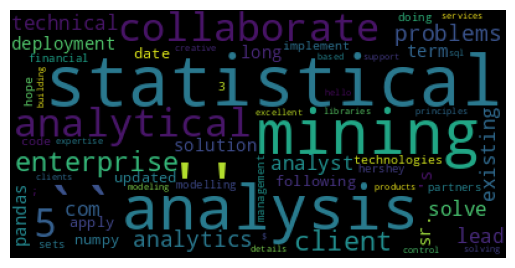

In [291]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import collections

freq = {}
num_data_jobs = len(relevant_links)
for index, feature in enumerate(data_specific_features):
    freq[feature] = int(num_data_jobs * math.exp(-feature_score[feature]))

sorted_freq = collections.OrderedDict(sorted(freq.items(), key=lambda t: t[1]))
for keys, values in sorted_freq.items():
    print("{} - {}".format(keys, values))

wordcloud = WordCloud().generate_from_frequencies(frequencies=sorted_freq)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

technical - 1710
analyst - 1710
com - 1710
lead - 1710
solve - 1710
existing - 1710
deployment - 1710
pandas - 1710
term - 1710
solution - 1710
's - 1710
sr. - 1710
long - 1710
following - 1710
updated - 1710
numpy - 1710
date - 1710
apply - 1710
implement - 1710
; - 1710
3 - 1710
hope - 1710
code - 1710
technologies - 1710
modelling - 1710
financial - 1710
partners - 1710
hershey - 1710
doing - 1710
management - 1710
sets - 1710
principles - 1710
solving - 1710
building - 1710
expertise - 1710
support - 1710
$ - 1710
modeling - 1710
hello - 1710
libraries - 1710
excellent - 1710
clients - 1710
control - 1710
details - 1710
creative - 1710
products - 1710
services - 1710
based - 1710
sql - 1710
'' - 2280
`` - 2280
analysis - 2280
mining - 2280
analytical - 2280
collaborate - 2280
5 - 2280
enterprise - 2280
client - 2280
analytics - 2280
problems - 2280
statistical - 2851


(-0.5, 399.5, 199.5, -0.5)

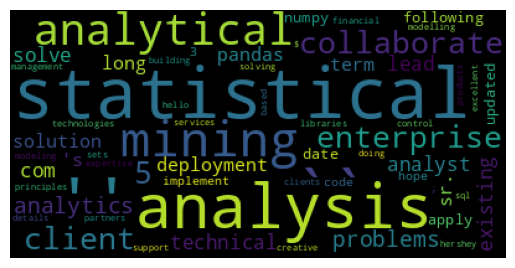

In [292]:
import math
import collections
from operator import itemgetter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have the following variables defined:
# relevant_links, data_specific_features, feature_score

freq = {}
num_data_jobs = len(relevant_links)
for index, feature in enumerate(data_specific_features):
    freq[feature] = int(num_data_jobs * math.exp(-feature_score[feature]))

sorted_freq = collections.OrderedDict(sorted(freq.items(), key=lambda t: t[1]))
for keys, values in sorted_freq.items():
    print("{} - {}".format(keys, values))

wordcloud = WordCloud().generate_from_frequencies(frequencies=freq)
plt.imshow(wordcloud)
plt.axis("off")